In [1]:
# Import libraries
import numpy as np # library to handle data in a vectorized manner
import json # library to handle JSON files
import pandas as pd

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cmparis = pd.read_csv('https://raw.githubusercontent.com/AR-data-science/Coursera_Capstone/master/Arrondissements_.csv')
paris
import matplotlib.colors as colors

from bs4 import BeautifulSoup

# Import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\vshah14\Anaconda3

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0




geopy-1.22.0         | 63 KB     |            |   0% 
geopy-1.22.0         | 63 KB     | ##5        |  26% 
geopy-1.22.0         | 63 KB     | ########## | 100% 

geographiclib-1.50   | 34 KB     |            |   0% 
geographiclib-1.5

In [2]:
paris = pd.read_csv('https://raw.githubusercontent.com/AR-data-science/Coursera_Capstone/master/Arrondissements_.csv')
paris

,CAR,NAME,NSQAR,CAR.1,CARINSEE,LAR,NSQCO,SURFACE,PERIMETRE,Geometry_X,Geometry_Y
0,3,Temple,750000003,3,3,3eme Ardt,750001537,1170882828,4519264,48.862872,2.360001
1,19,Buttes-Chaumont,750000019,19,19,19eme Ardt,750001537,6792651129,11253182,48.887076,2.384821
2,14,Observatoire,750000014,14,14,14eme Ardt,750001537,5614877309,10317483,48.829245,2.326542
3,10,Entrepot,750000010,10,10,10eme Ardt,750001537,2891739442,6739375,48.876130,2.360728
4,12,Reuilly,750000012,12,12,12eme Ardt,750001537,16314782637,24089666,48.834974,2.421325
5,16,Passy,750000016,16,16,16eme Ardt,750001537,16372542129,17416110,48.860392,2.261971
6,11,Popincourt,750000011,11,11,11eme Ardt,750001537,3665441552,8282012,48.859059,2.380058
7,2,Bourse,750000002,2,2,2eme Ardt,750001537,991153745,4554104,48.868279,2.342803
8,4,Hotel-de-Ville,750000004,4,4,4eme Ardt,750001537,1600585632,5420908,48.854341,2.357630
9,17,Batignolles-Monceau,750000017,17,17,17eme Ardt,750001537,5668834504,10775580,48.887327,2.306777


In [3]:
paris.rename(columns={'NAME': 'Neighborhood ', 'CAR': 'Arrondissement_Num', 'Geometry_X': 'Latitude', 'Geometry_Y': 'Longitude',  'LAR': 'French_Name'}, inplace=True)
paris

,Arrondissement_Num,Neighborhood,NSQAR,CAR.1,CARINSEE,French_Name,NSQCO,SURFACE,PERIMETRE,Latitude,Longitude
0,3,Temple,750000003,3,3,3eme Ardt,750001537,1170882828,4519264,48.862872,2.360001
1,19,Buttes-Chaumont,750000019,19,19,19eme Ardt,750001537,6792651129,11253182,48.887076,2.384821
2,14,Observatoire,750000014,14,14,14eme Ardt,750001537,5614877309,10317483,48.829245,2.326542
3,10,Entrepot,750000010,10,10,10eme Ardt,750001537,2891739442,6739375,48.876130,2.360728
4,12,Reuilly,750000012,12,12,12eme Ardt,750001537,16314782637,24089666,48.834974,2.421325
5,16,Passy,750000016,16,16,16eme Ardt,750001537,16372542129,17416110,48.860392,2.261971
6,11,Popincourt,750000011,11,11,11eme Ardt,750001537,3665441552,8282012,48.859059,2.380058
7,2,Bourse,750000002,2,2,2eme Ardt,750001537,991153745,4554104,48.868279,2.342803
8,4,Hotel-de-Ville,750000004,4,4,4eme Ardt,750001537,1600585632,5420908,48.854341,2.357630
9,17,Batignolles-Monceau,750000017,17,17,17eme Ardt,750001537,5668834504,10775580,48.887327,2.306777


In [4]:
paris.drop(['NSQAR','CAR.1','CARINSEE','NSQCO','SURFACE', 'PERIMETRE' ], axis=1, inplace=True)
paris

,Arrondissement_Num,Neighborhood,French_Name,Latitude,Longitude
0,3,Temple,3eme Ardt,48.862872,2.360001
1,19,Buttes-Chaumont,19eme Ardt,48.887076,2.384821
2,14,Observatoire,14eme Ardt,48.829245,2.326542
3,10,Entrepot,10eme Ardt,48.876130,2.360728
4,12,Reuilly,12eme Ardt,48.834974,2.421325
5,16,Passy,16eme Ardt,48.860392,2.261971
6,11,Popincourt,11eme Ardt,48.859059,2.380058
7,2,Bourse,2eme Ardt,48.868279,2.342803
8,4,Hotel-de-Ville,4eme Ardt,48.854341,2.357630
9,17,Batignolles-Monceau,17eme Ardt,48.887327,2.306777


In [5]:
paris.shape

(20, 5)

In [6]:
from geopy.geocoders import Nominatim 

address = 'Paris'

# Define the user_agent as Paris_explorer
geolocator = Nominatim(user_agent="Paris_explorer")

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geographical coordinates of Paris France are {}, {}.'.format(latitude, longitude))

The geographical coordinates of Paris France are 48.8566969, 2.3514616.


In [7]:
map_paris = folium.Map(location=[latitude, longitude], zoom_start=12)


# add markers to map
for lat, lng, label in zip(paris['Latitude'], paris['Longitude'], paris['French_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=25,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_paris)  
    
map_paris

In [8]:
CLIENT_ID = 'RU3Y3XCL1D3X4IFWHEPI3VYYAEEGSWMVQTWP2PHZ1DEL1E2R' # your Foursquare ID
CLIENT_SECRET = 'GMMPCVSMWDJDXSOTEO22G3FN4H2BUFSZO05SYEGRGW4N5AKL' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RU3Y3XCL1D3X4IFWHEPI3VYYAEEGSWMVQTWP2PHZ1DEL1E2R
CLIENT_SECRET:GMMPCVSMWDJDXSOTEO22G3FN4H2BUFSZO05SYEGRGW4N5AKL


In [9]:
paris.loc[0, 'French_Name']
paris.loc[0, 'French_Name']

'3eme Ardt'

In [10]:
# Get the Neighborhood's latitude and longitude values.

neighborhood_latitude = paris.loc[0, 'Latitude'] # Neighborhood latitude value
neighborhood_longitude = paris.loc[0, 'Longitude'] # Neighborhood longitude value

neighborhood_name = paris.loc[0, 'French_Name'] # Neighborhood name

print('Latitude and longitude values of the neighborhood {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of the neighborhood 3eme Ardt are 48.86287238, 2.3600009859999997.


In [11]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # displays the URL

'https://api.foursquare.com/v2/venues/explore?&client_id=RU3Y3XCL1D3X4IFWHEPI3VYYAEEGSWMVQTWP2PHZ1DEL1E2R&client_secret=GMMPCVSMWDJDXSOTEO22G3FN4H2BUFSZO05SYEGRGW4N5AKL&v=20180605&ll=48.86287238,2.3600009859999997&radius=500&limit=100'

In [12]:
# Send the GET request and examine the resutls

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ed3e25f542890001be29463'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Enfants-Rouges',
  'headerFullLocation': 'Enfants-Rouges, Paris',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 81,
  'suggestedBounds': {'ne': {'lat': 48.8673723845, 'lng': 2.3668285468065267},
   'sw': {'lat': 48.8583723755, 'lng': 2.353173425193473}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4d974096a2c654814aa6d353',
       'name': 'Mmmozza',
       'location': {'address': '57 rue de Bretagne',
        'lat': 48.86391016055883,
        'lng': 2.360590696334839,
        'labeledLatLngs': [{'label': 'display',
          'lat': 48.8639101605588

In [13]:

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [14]:
# clean the json and structure it into a pandas dataframe.

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(20)

C:\Users\vshah14\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,name,categories,lat,lng
0,Mmmozza,Sandwich Place,48.863910,2.360591
1,Chez Alain Miam Miam,Sandwich Place,48.862369,2.361950
2,Square du Temple,Park,48.864475,2.360816
3,Marché des Enfants Rouges,Farmers Market,48.862806,2.361996
4,Chez Alain Miam Miam,Sandwich Place,48.862781,2.362064
5,Okomusu,Okonomiyaki Restaurant,48.861453,2.360879
6,Le Burger Fermier des Enfants Rouges,Burger Joint,48.862831,2.362073
7,Hôtel Jules & Jim,Hotel,48.863496,2.357395
8,SoMa,Japanese Restaurant,48.861511,2.362146
9,Les Enfants Rouges,Wine Bar,48.863013,2.361260


In [15]:

print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

81 venues were returned by Foursquare.


In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['French_Name', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
# Create a new dataframe called paris_venues.

paris_venues = getNearbyVenues(names=paris['French_Name'],
                                   latitudes=paris['Latitude'],
                                   longitudes=paris['Longitude']
                                  )

3eme Ardt
19eme Ardt
14eme Ardt
10eme Ardt
12eme Ardt
16eme Ardt
11eme Ardt
2eme Ardt
4eme Ardt
17eme Ardt
18eme Ardt
1er Ardt
5eme Ardt
7eme Ardt
20eme Ardt
8eme Ardt
9eme Ardt
13eme Ardt
15eme Ardt
6eme Ardt


In [18]:
print(paris_venues.shape)
paris_venues.head(250)

(1246, 7)


,French_Name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,3eme Ardt,48.862872,2.360001,Mmmozza,48.863910,2.360591,Sandwich Place
1,3eme Ardt,48.862872,2.360001,Chez Alain Miam Miam,48.862369,2.361950,Sandwich Place
2,3eme Ardt,48.862872,2.360001,Square du Temple,48.864475,2.360816,Park
3,3eme Ardt,48.862872,2.360001,Marché des Enfants Rouges,48.862806,2.361996,Farmers Market
4,3eme Ardt,48.862872,2.360001,Chez Alain Miam Miam,48.862781,2.362064,Sandwich Place
...,...,...,...,...,...,...,...
245,10eme Ardt,48.876130,2.360728,Hotel Mademoiselle,48.877275,2.354361,Hotel
246,10eme Ardt,48.876130,2.360728,Hôtel Hor,48.879423,2.357819,Hotel
247,10eme Ardt,48.876130,2.360728,Midnight Hotel,48.877301,2.356188,Hotel
248,12eme Ardt,48.834974,2.421325,Rocher du Zoo de Vincennes,48.833523,2.418366,Monument / Landmark


In [19]:
paris_venues.groupby('French_Name').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
French_Name,,,,,,
10eme Ardt,100,100,100,100,100,100
11eme Ardt,70,70,70,70,70,70
12eme Ardt,4,4,4,4,4,4
13eme Ardt,64,64,64,64,64,64
14eme Ardt,25,25,25,25,25,25
15eme Ardt,60,60,60,60,60,60
16eme Ardt,12,12,12,12,12,12
17eme Ardt,57,57,57,57,57,57
18eme Ardt,43,43,43,43,43,43


In [20]:
print('There are {} unique venue categories.'.format(len(paris_venues['Venue Category'].unique())))


There are 193 unique venue categories.


In [21]:
# Analyze each of the Neighborhoods from the results

# one hot encoding
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_onehot['Neighborhood'] = paris_venues['French_Name'] 

# move neighborhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,6eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,6eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1243,6eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1244,6eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# The shape of the dataframe is
paris_onehot.shape

(1246, 194)

In [23]:
paris_grouped = paris_onehot.groupby('Neighborhood').mean().reset_index()
paris_grouped

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Women's Store,Zoo,Zoo Exhibit
0,10eme Ardt,0.000000,0.02,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.020000,...,0.010000,0.00,0.000000,0.000000,0.00,0.010000,0.020000,0.000000,0.00,0.00
1,11eme Ardt,0.014286,0.00,0.00000,0.00,0.000000,0.000000,0.014286,0.000000,0.014286,...,0.014286,0.00,0.014286,0.014286,0.00,0.042857,0.000000,0.014286,0.00,0.00
2,12eme Ardt,0.000000,0.00,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.25,0.25
3,13eme Ardt,0.000000,0.00,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.187500,...,0.000000,0.00,0.000000,0.234375,0.00,0.000000,0.000000,0.000000,0.00,0.00
4,14eme Ardt,0.000000,0.00,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00
5,15eme Ardt,0.000000,0.00,0.00000,0.00,0.000000,0.000000,0.000000,0.016667,0.016667,...,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.033333,0.000000,0.00,0.00
6,16eme Ardt,0.000000,0.00,0.00000,0.00,0.000000,0.000000,0.083333,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00
7,17eme Ardt,0.000000,0.00,0.00000,0.00,0.000000,0.000000,0.017544,0.000000,0.017544,...,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00
8,18eme Ardt,0.000000,0.00,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.023256,0.00,0.023256,0.000000,0.000000,0.00,0.00
9,19eme Ardt,0.000000,0.00,0.02381,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.023810,0.00,0.000000,0.000000,0.000000,0.00,0.00


In [24]:
# The shape of the grouped data is
paris_grouped.shape

(20, 194)

In [25]:
# Each  neighborhood with top 10 most common venues

num_top_venues = 10

for hood in paris_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = paris_grouped[paris_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----10eme Ardt----
                 venue  freq
0    French Restaurant  0.13
1                Hotel  0.06
2          Coffee Shop  0.05
3               Bistro  0.04
4                 Café  0.04
5    Indian Restaurant  0.04
6          Pizza Place  0.03
7  Japanese Restaurant  0.03
8           Restaurant  0.02
9   Italian Restaurant  0.02


----11eme Ardt----
                 venue  freq
0    French Restaurant  0.11
1                 Café  0.07
2          Supermarket  0.06
3             Wine Bar  0.04
4          Pastry Shop  0.04
5           Restaurant  0.04
6          Pizza Place  0.03
7  Japanese Restaurant  0.03
8               Bakery  0.03
9                  Bar  0.03


----12eme Ardt----
                     venue  freq
0              Zoo Exhibit  0.25
1      Monument / Landmark  0.25
2              Supermarket  0.25
3                      Zoo  0.25
4       Italian Restaurant  0.00
5         Pedestrian Plaza  0.00
6  New American Restaurant  0.00
7                Nightclub  0.00
8   

In [26]:
# First sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [27]:
# create the new dataframe and display the top 10 venues for each neighborhood

num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# create a new dataframe
paris_venues_sorted = pd.DataFrame(columns=columns)
paris_venues_sorted['Neighborhood'] = paris_grouped['Neighborhood']

for ind in np.arange(paris_grouped.shape[0]):
    paris_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

paris_venues_sorted.head(20)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10eme Ardt,French Restaurant,Hotel,Coffee Shop,Bistro,Indian Restaurant,Café,Pizza Place,Japanese Restaurant,Breakfast Spot,Seafood Restaurant
1,11eme Ardt,French Restaurant,Café,Supermarket,Restaurant,Wine Bar,Pastry Shop,Pizza Place,Cocktail Bar,Theater,Japanese Restaurant
2,12eme Ardt,Zoo Exhibit,Zoo,Supermarket,Monument / Landmark,Dive Bar,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Exhibit
3,13eme Ardt,Vietnamese Restaurant,Asian Restaurant,Thai Restaurant,Chinese Restaurant,French Restaurant,Juice Bar,Japanese Restaurant,Bakery,Cosmetics Shop,Bus Stop
4,14eme Ardt,French Restaurant,Hotel,Supermarket,Bistro,Pizza Place,Bakery,Food & Drink Shop,Brasserie,Sushi Restaurant,Tea Room
5,15eme Ardt,Hotel,French Restaurant,Italian Restaurant,Coffee Shop,Brasserie,Thai Restaurant,Park,Wine Shop,Supermarket,Lebanese Restaurant
6,16eme Ardt,Lake,Park,Trail,French Restaurant,Bus Station,Boat or Ferry,Bus Stop,Plaza,Art Museum,Pool
7,17eme Ardt,Hotel,French Restaurant,Italian Restaurant,Japanese Restaurant,Bakery,Café,Plaza,Bistro,Sushi Restaurant,Bike Rental / Bike Share
8,18eme Ardt,Bar,French Restaurant,Convenience Store,Pizza Place,Hotel,Coffee Shop,Restaurant,Middle Eastern Restaurant,Supermarket,Mediterranean Restaurant
9,19eme Ardt,French Restaurant,Bar,Brewery,Bistro,Supermarket,Beer Bar,Hotel,Seafood Restaurant,Canal,Burger Joint


In [28]:
# The shape of the sorted data is
paris_venues_sorted.shape

(20, 11)

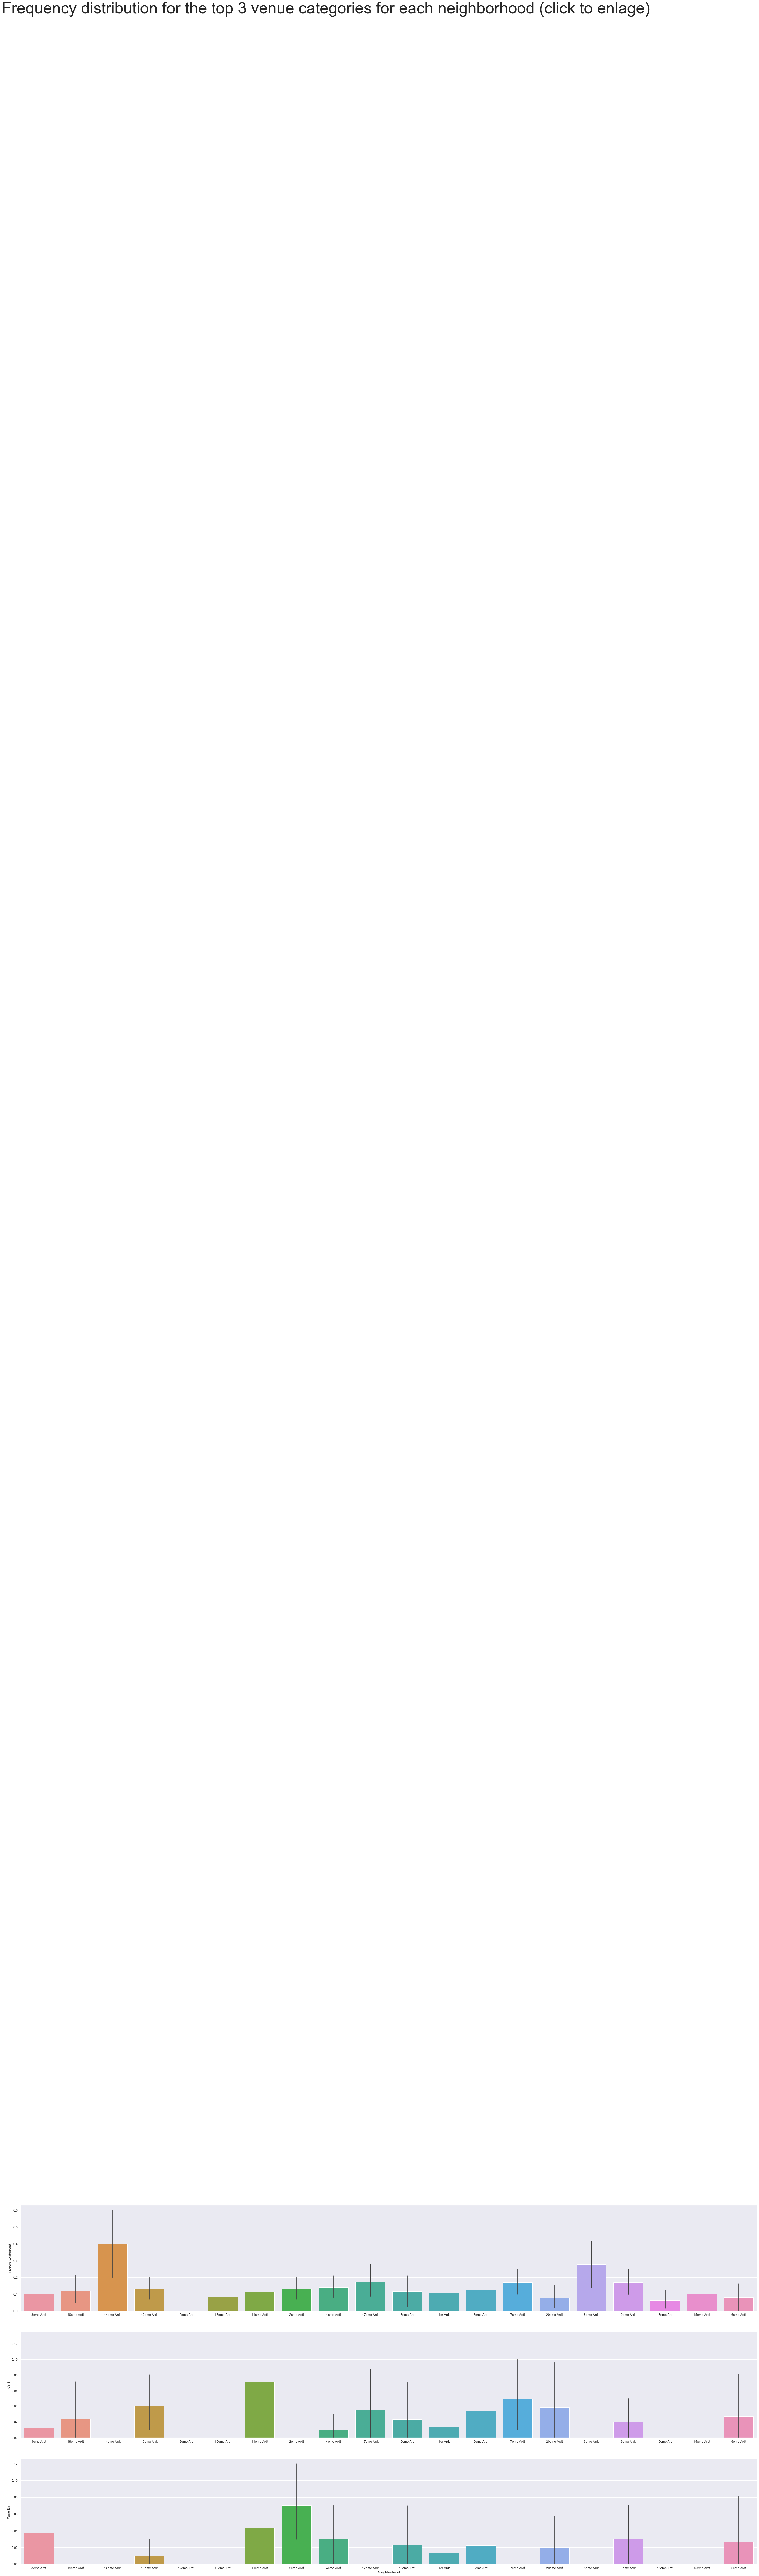

In [31]:
# Categorical plot
# Explore a plot of this data (a violin plot is used which is a density estimation of the underlying distribution).
# The top 3 venue types as specified by the client for each neighborhood are used for the plotting.

import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(3,1,1)
sns.barplot(x="Neighborhood", y="French Restaurant", data=paris_onehot);
plt.xlabel("")

ax = plt.subplot(3,1,2)
sns.barplot(x="Neighborhood", y="Café", data=paris_onehot);
plt.xlabel("")

plt.subplot(3,1,3)
sns.barplot(x="Neighborhood", y="Wine Bar", data=paris_onehot);

ax.text(-1.0, 3.1, 'Frequency distribution for the top 3 venue categories for each neighborhood (click to enlage)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_3_categories.png", dpi=240)
plt.show()

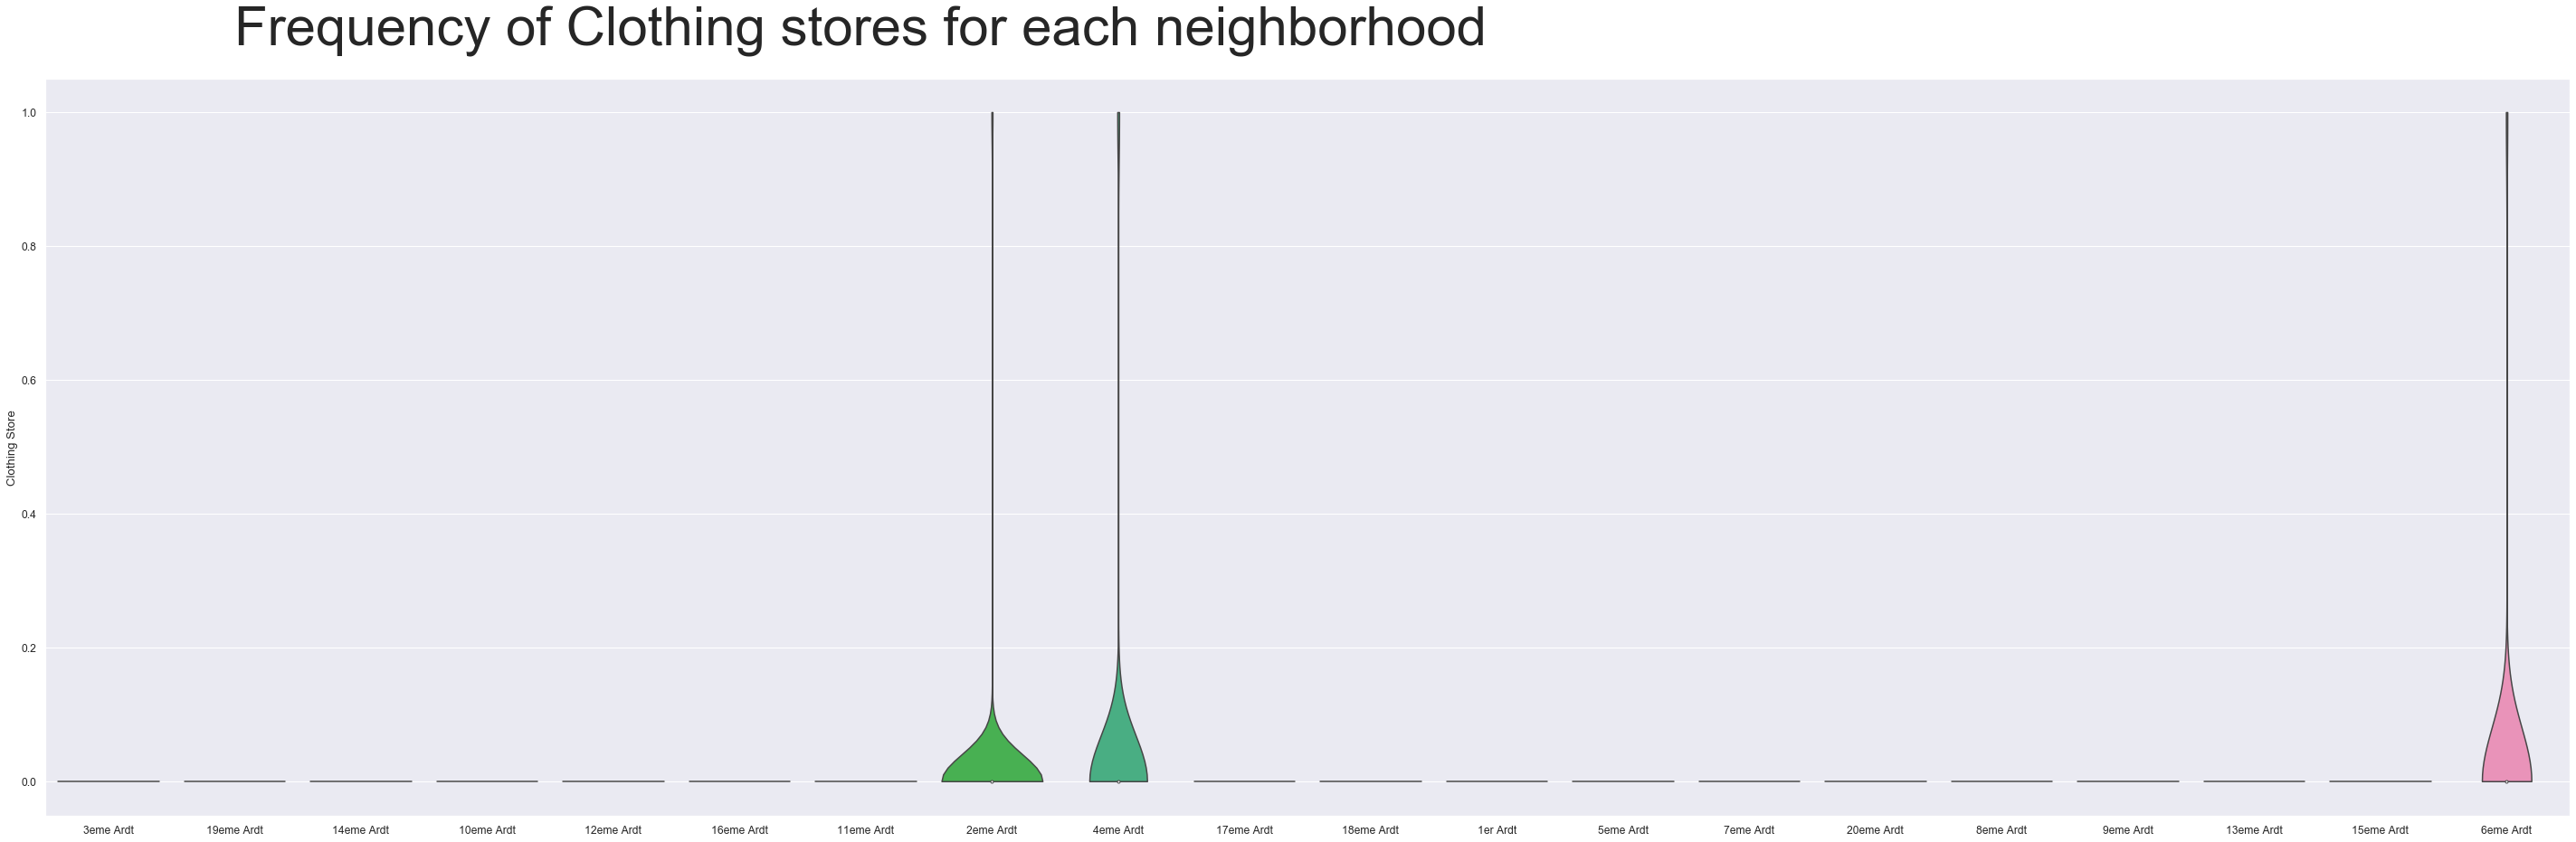

In [32]:
# Add the Clothing_Store to explore this category
import seaborn as sns

fig = plt.figure(figsize=(50,15))
sns.set(font_scale=1.1)

ax = plt.subplot(1,1,1)
sns.violinplot(x="Neighborhood", y="Clothing Store", data=paris_onehot, cut=0);
plt.xlabel("")

ax.text(1.0, 1.1, 'Frequency of Clothing stores for each neighborhood', fontsize=60)
plt.savefig ("Distribution_Frequency_Clothing_Venues.png", dpi=240)
plt.show()

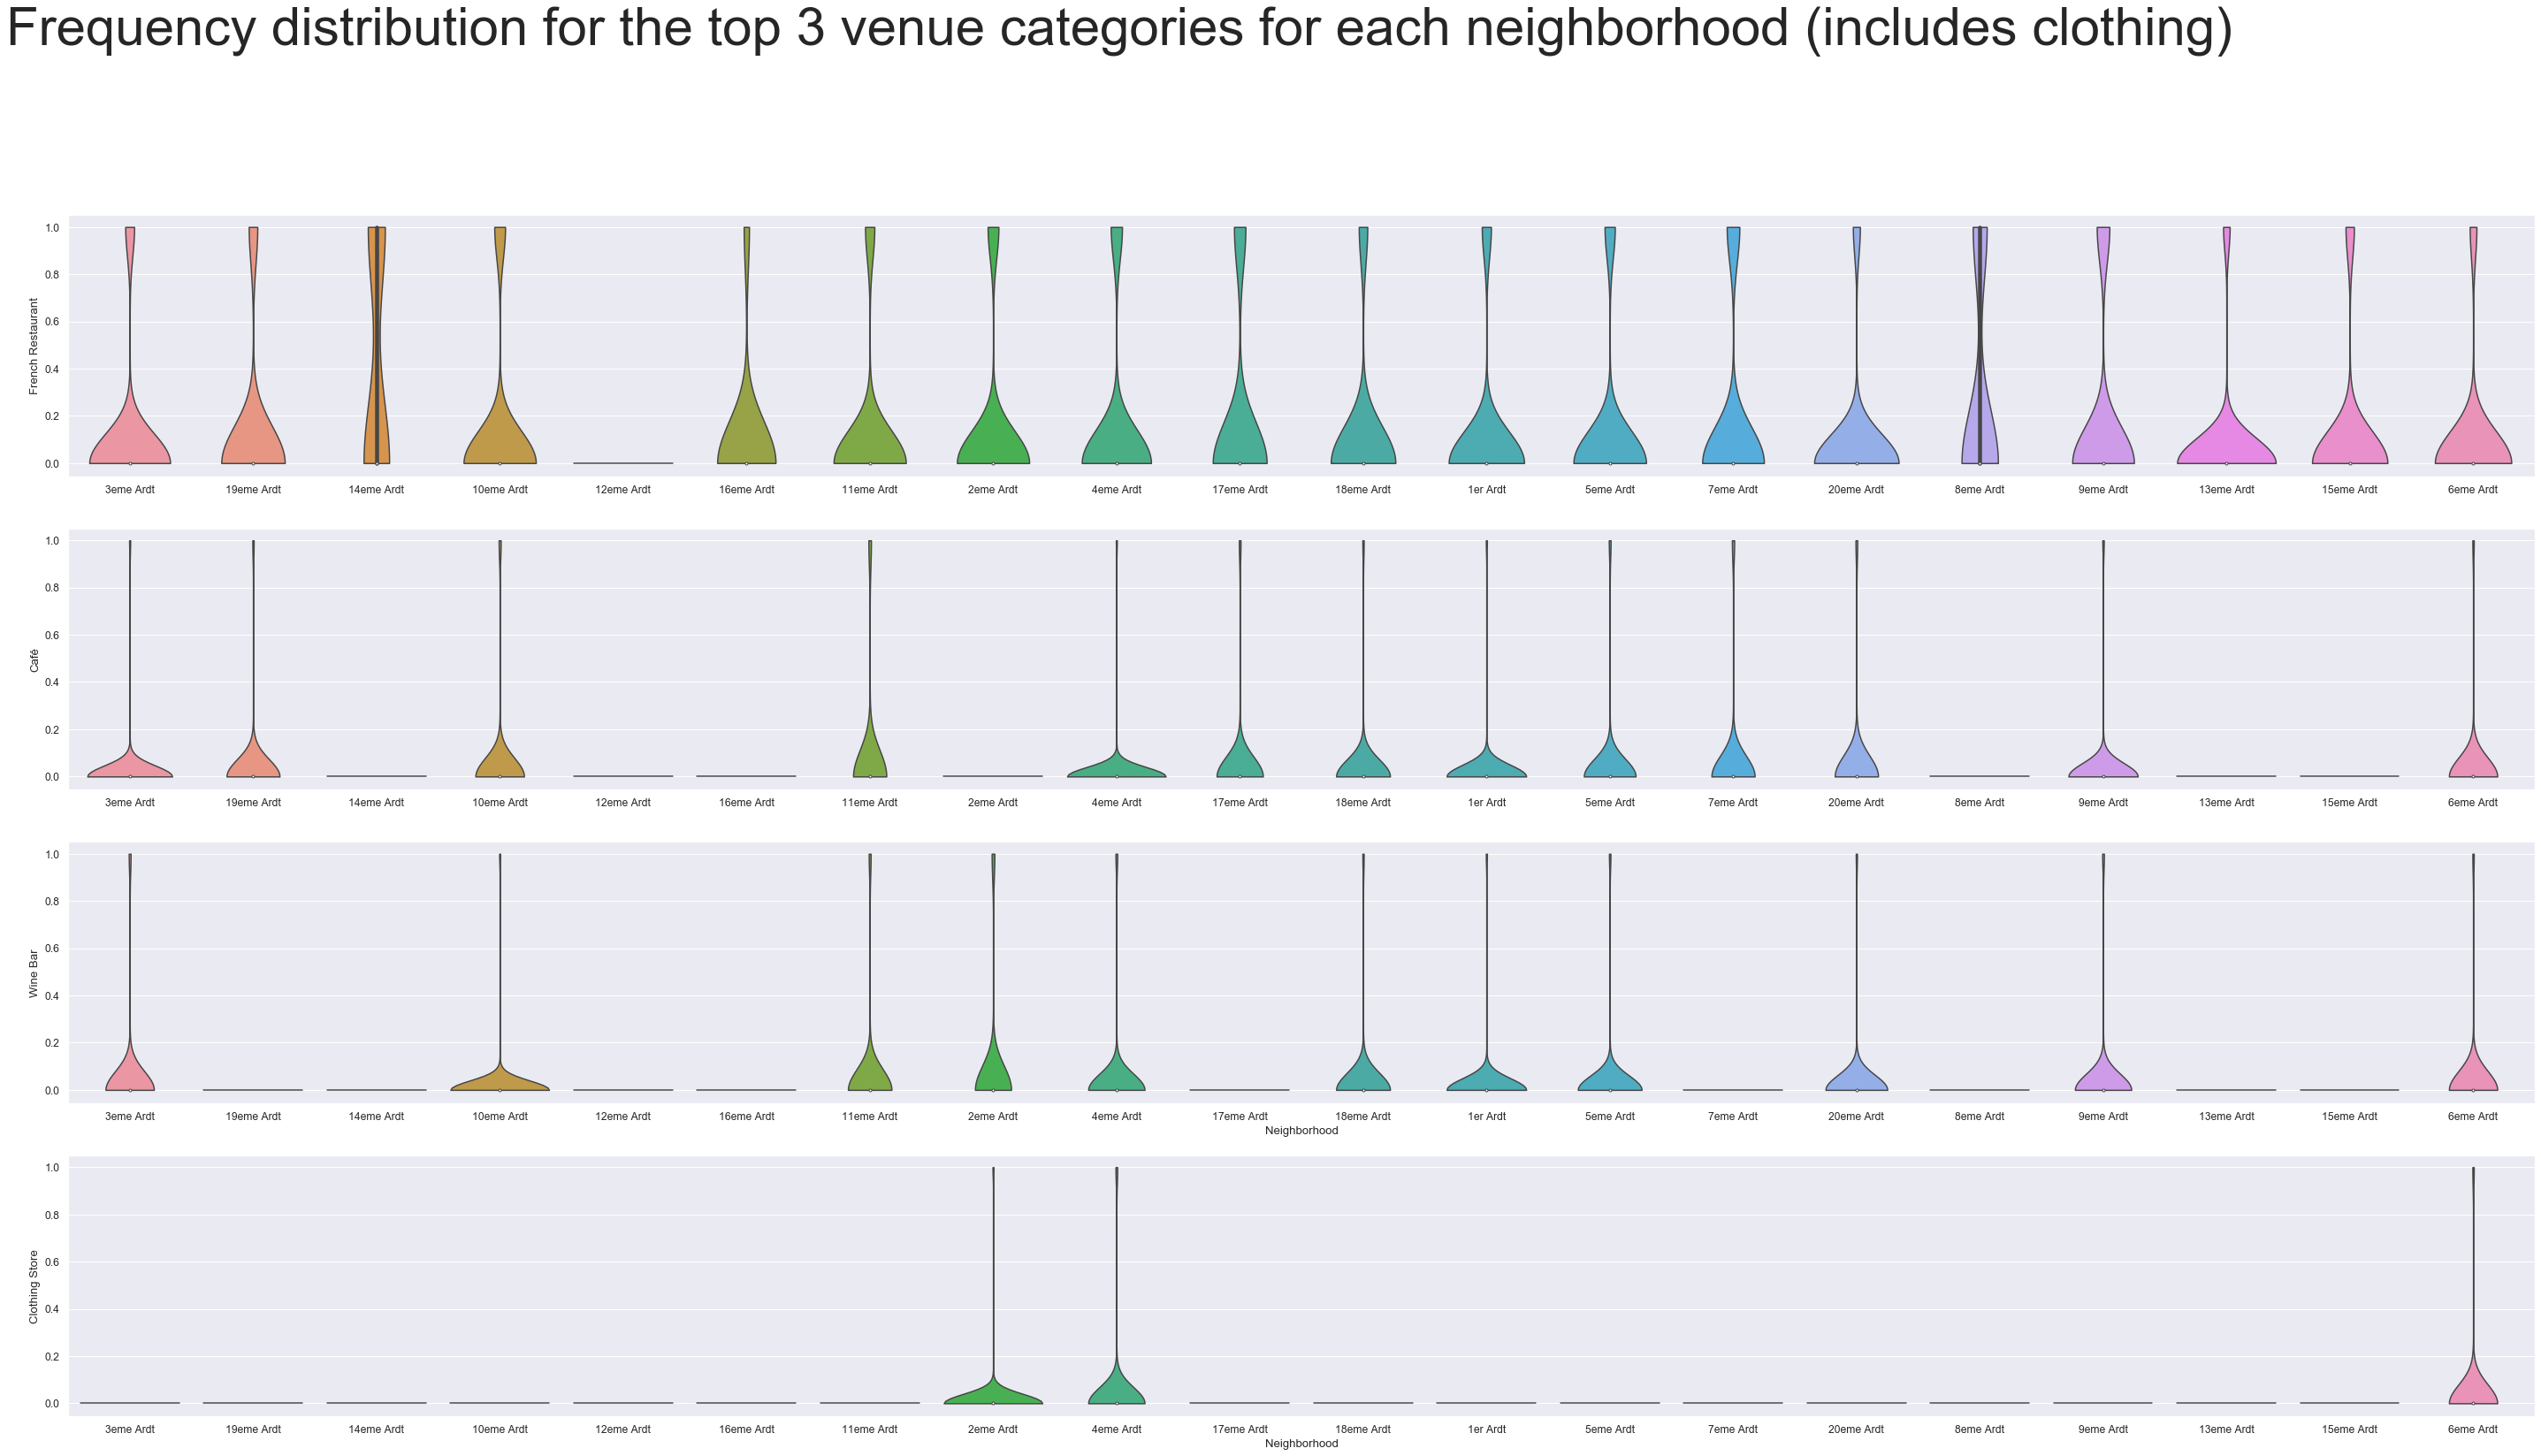

In [33]:
# Clothing_Store has been added to explore this category and make a comparison

import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(4,1,1)
sns.violinplot(x="Neighborhood", y="French Restaurant", data=paris_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(4,1,2)
sns.violinplot(x="Neighborhood", y="Café", data=paris_onehot, cut=0);
plt.xlabel("")

plt.subplot(4,1,3)
sns.violinplot(x="Neighborhood", y="Wine Bar", data=paris_onehot, cut=0);

plt.subplot(4,1,4)
sns.violinplot(x="Neighborhood", y="Clothing Store", data=paris_onehot, cut=0);

ax.text(-1.0, 3.1, 'Frequency distribution for the top 3 venue categories for each neighborhood (includes clothing)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_3_categories_clothing.png", dpi=240)
plt.show()

In [34]:
# The csv of the 3 chosen prospective neighborhoods was uploaded to GitHub for access and reference
# Download and put into a new dataframe called chosen_districts

chosen_districts = pd.read_csv('https://raw.githubusercontent.com/AR-data-science/Coursera_Capstone/master/Week%205/Chosen.csv')
chosen_districts

,Arrondissement_Num,Neighborhood,French_Name,Latitude,Longitude
0,3,Temple,3eme Ardt,48.862872,2.360001
1,4,Hotel-de-Ville,4eme Ardt,48.854341,2.357630
2,6,Luxembourg,6eme Ardt,48.849130,2.332898


In [35]:
# Create a folium map of Paris with the 3 neighborhoods superimposed on the map
map_chosen_districts = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, label in zip(chosen_districts['Latitude'], chosen_districts['Longitude'], chosen_districts['French_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=45,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.2,
        parse_html=False).add_to(map_chosen_districts)  
    
map_chosen_districts

In [36]:
map_chosen_districts = folium.Map(location=[latitude, longitude], zoom_start=15)

# add markers to map
for lat, lng, label in zip(chosen_districts['Latitude'], chosen_districts['Longitude'], chosen_districts['French_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=130,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.2,
        parse_html=False).add_to(map_chosen_districts)  
    
map_chosen_districts